<a href="https://www.kaggle.com/code/suryanshmehrotra/multiple-linear-regression?scriptVersionId=124699444" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #visualisation
import seaborn as sns #visualisation-2
from sklearn.linear_model import SGDRegressor #stochastic gradient descent regressor
from sklearn.preprocessing import StandardScaler #for scaling/normalizing
plt.style.use('ggplot')
np.set_printoptions(precision=3) #setting precision/decimals upto 3

In [2]:
df = pd.read_csv("/kaggle/input/multiple-linear-regression-dataset/multiple_linear_regression_dataset.csv")
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [3]:
x_train = df[['age', 'experience']].values.astype(int) #featues as array
y_train = df['income'].values# target values
x_features = ['age', 'experience']

In [4]:
x_train

array([[25,  1],
       [30,  3],
       [47,  2],
       [32,  5],
       [43, 10],
       [51,  7],
       [28,  5],
       [33,  4],
       [37,  5],
       [39,  8],
       [29,  1],
       [47,  9],
       [54,  5],
       [51,  4],
       [44, 12],
       [41,  6],
       [58, 17],
       [23,  1],
       [44,  9],
       [37, 10]])

In [5]:
y_train

array([30450, 35670, 31580, 40130, 47830, 41630, 41340, 37650, 40250,
       45150, 27840, 46110, 36720, 34800, 51300, 38900, 63600, 30870,
       44190, 48700])

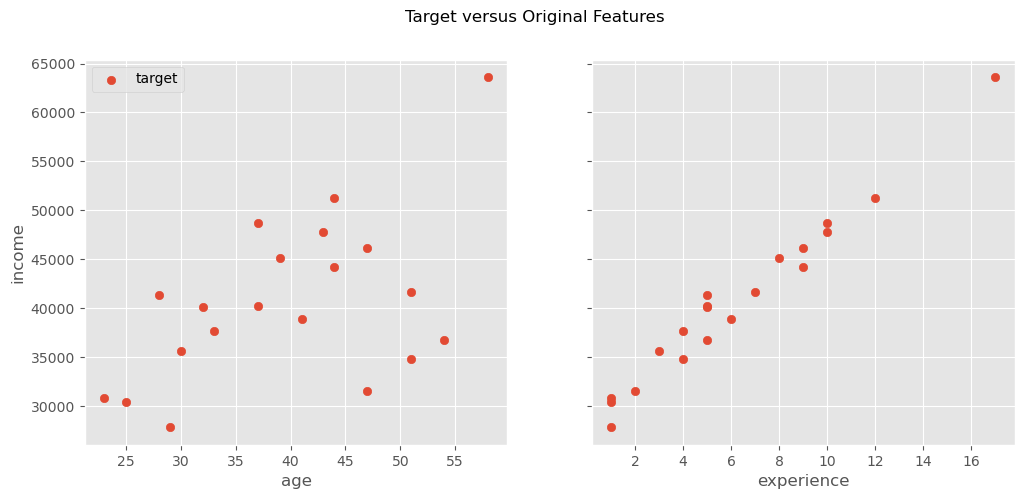

In [6]:
# plot targets vs original features    
fig,ax = plt.subplots(1,2,figsize=(12,5),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel("income"); ax[0].legend();
fig.suptitle("Target versus Original Features")
plt.show()

In [7]:
#Scaleing/ normalizing the training data
scaler = StandardScaler()
x_norm = scaler.fit_transform(x_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(x_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[35 16]
Peak to Peak range by column in Normalized X:[3.581 3.98 ]


In [8]:
# Creating and fitting the regression model
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(x_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 637, number of weight updates: 12741.0


In [9]:
#Viewing parameters
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [-957.538 8681.777], b:[40735.142]


In [10]:
# make a prediction using sgdr.predict()
y_pred = sgdr.predict(x_norm)

#or

# make a prediction using w,b. 
#y_pred = np.dot(x_norm, w_norm) + b_norm  
print(f"Prediction on training set:\n{y_pred[:5]}" )
print(f"Target values: \n{y_train[:5]}")

Prediction on training set:
[30940.1   34769.597 30944.439 38893.003 48613.7  ]
Target values: 
[30450 35670 31580 40130 47830]


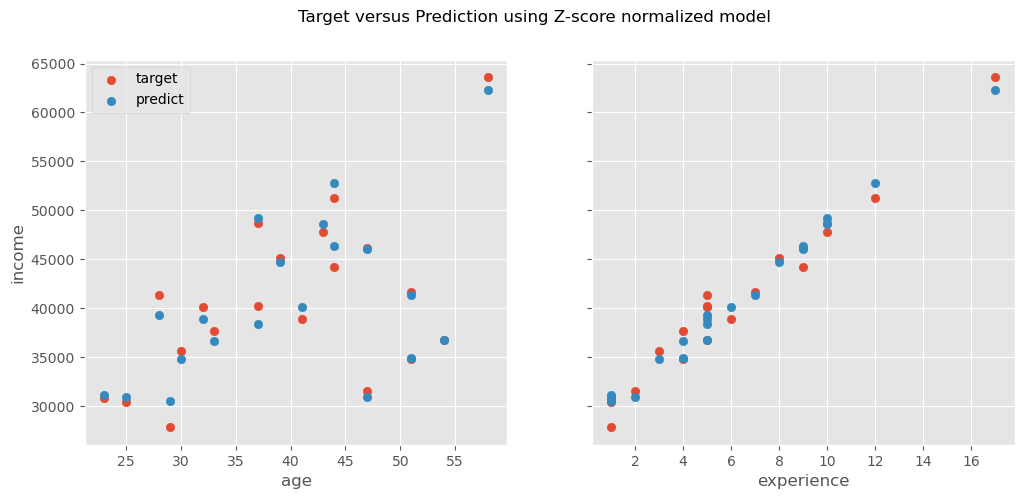

In [11]:
# plot predictions and targets vs original features    
fig, ax = plt.subplots(1,2,figsize=(12,5),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(x_features[i])
    ax[i].scatter(x_train[:,i],y_pred, label = 'predict')
ax[0].set_ylabel("income"); ax[0].legend();
fig.suptitle("Target versus Prediction using Z-score normalized model")
plt.show()